<a href="https://colab.research.google.com/github/ViniciusMangueira/Data_Science/blob/main/An%C3%A1lise_da_Viol%C3%AAncia_no_Rio_de_Janeiro_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise da Violência no Rio de Janeiro 

Vamos fazer 3 analises Veículos Roubados/Furtados, Mortes Policiais, Roubo a Caixa Eletrônico/Instituições Financeiras/Bancos

##Importação dos dados  

Inicialmente vamos importar nossas bibliotecas para que, posteriormente,  possamos importar a base de dados da policia militar do Rio de Janeiro sobre a violência e, por fim, visualizar o tamanho e os tipos das variáveis do dataset. 

In [ ]:
#Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Ler arquivo
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')

In [ ]:
# Formato do arquivo
print('Nosso arquivo possui {} entradas e {} atributos .'.format(df.shape[0], df.shape[1]))

# Tipos dos atributos
print('Tipo dos atributos:\n', df.dtypes)

Nosso arquivo possui 344 entradas e 56 atributos .
Tipo dos atributos:
 vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos    

## Análise inicial

Por serem muitas variáveis, nesse caso não faremos o dicionário das variáveis. No entanto, caso tenha alguma dúvida você pode baixar o arquivo [aqui](http://www.ispdados.rj.gov.br/Arquivos/BaseDpDicionarioDeVariaveis.xlsx) e consultar o que significa cada atributo. 

Antes de mais nada, vamos ver as 5 primeiras entradas da base de dados para termos alguma noção inicial de como ela é.

In [ ]:
# Visualizar as 5 primeiras entradas
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


Após a visualização acima, é perceptível que existem muitos dados faltantes ‘NaN’ no dataset. A seguir vamos dar uma atenção para esses dados.

### Dados Faltantes, os famosos 'NaN'

Primeiramente vamos ver a quantidade de dados faltantes que existem no dataset e, em seguida, a sua porcentagem com relação a todos os dados. 

In [ ]:
# Visualizar dados faltantes
df.isnull().sum().sort_values(ascending=False)

roubo_bicicleta               276
furto_bicicleta               276
apreensao_drogas_sem_autor    180
posse_drogas                  180
apf                           180
aaapai                        180
cmp                           180
trafico_drogas                180
cmba                          180
sequestro_relampago           144
furto_coletivo                144
extorsao                      144
furto_celular                 144
roubo_apos_saque              144
roubo_conducao_saque          144
roubo_cx_eletronico           144
estupro                       144
estelionato                   144
pol_civis_mortos_serv         144
pol_militares_mortos_serv     144
pessoas_desaparecidas         132
encontro_ossada               132
roubo_celular                 108
lesao_corp_culposa             96
ameaca                         96
sequestro                      96
lesao_corp_morte               96
registro_ocorrencias           96
hom_por_interv_policial        84
hom_culposo   

In [ ]:
# Visualizar dados faltantes
df.isnull().sum().sort_values(ascending=False) / df.shape[0]

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

Como vemos acima, nossa hipótese anterior de que faltavam muitos dados estava correta. Atributos como `roubo_bicicleta` e `furto_bicicleta` possuem 276 dados faltantes o que resulta em 80% dos seus dados. 

Além deles, `apreensao_drogas_sem_autor`, `posse_drogas`, `apf`, `aaapai`, `cmp`, `trafico_drogas` e `cmba` possuem 180 valores ‘NaN`, quase 53% de todos seus valores.

### Informações Estatísticas e *outliers*

Abaixo, vamos ver algumas estatísticas do nosso dataset, principalmente para uma detecção inicial de *outliers*.

In [ ]:
# Ver estatísticas do dataset
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

Assim, em uma primeira vista não foi notada a presença significativa de *outliers*.


A seguir, vamos analisar algumas das nossas variáveis e tirar alguns insights da nossa base de dados a partir de histogramas.

## Análise dos Veículos Roubados/Furtados

Um dos tipos de crimes do nosso dataset é o roubo e furto de veículos, que é algo ocasionalmente ocorre no Brasil.

Agora, vamos fazer uma breve análise sobre esse tema. 

Inicialmente, calcularemos as médias das variáveis ` df.roubo_veiculo`, `df.furto_veiculos` e ` df.recuperacao_veiculos`  para que, em seguida, seja a feita a conta da porcentagem de quantos veículos foram recuperados.

In [ ]:
# Média de roubos, furtos e recuperações de veículos
print('='*60)
print('Média de veículos roubados: {:.0f}.'.format(df.roubo_veiculo.mean()))
print('Média de veículos furtados: {:.0f}.'.format(df.recuperacao_veiculos.mean()))
print('Média de veículos recuperados: {:.0f}.'.format(df.recuperacao_veiculos.mean()))
print('='*60)
print('Então, a porcentagem de veículos recuperados é de: {:.0f}% '.format(df.recuperacao_veiculos.mean() *100 / (df.roubo_veiculo.mean() + df.furto_veiculos.mean())))
print('='*60)

Média de veículos roubados: 2449.
Média de veículos furtados: 1772.
Média de veículos recuperados: 1772.
Então, a porcentagem de veículos recuperados é de: 43% 


Com uma porcentagem de 43% de veículos recuperados, a chance de que a polícia recupere é boa, visto que após o roubo muitos criminosos desmontam o carro para vender as peças separas ou até mesmo queimam o carro para não serem achados. 

## Análise de Mortes Policiais

Todos sabemos o quanto é perigoso ser policial da linha de frente em combate à violência. 

Infelizmente, nem todos conseguem voltar para suas casa após um dia de trabalho. Nessa parte do projeto, iremos ver a quantidade de policias mortos e a média de mortes e, para isso, vamos analisar as variáveis ` pol_civis_mortos_serv`, ` pol_militares_mortos_serv ` e ` hom_por_interv_policial `.

Antes de começarmos a análise, lembramos que existem muitos dados faltantes para esses atributos como vimos anteriormente.


### Policiais civis mortos em serviço 

Começaremos analisando a variável ` pol_civis_mortos_serv`.

A seguir, vemos que 68 policiais civis foram mortos ao todo das 200 informações sobre a variável ` pol_civis_mortos_serv` do nosso dataset, resultado que é razoavelmente alto. 

In [ ]:
# Quantidade de policiais civis mortos em serviço 
print('Quantidade de policiais civis mortos em serviço : ', df.pol_civis_mortos_serv.sum())

Quantidade de policiais civis mortos em serviço :  68.0


Como é possível ver abaixo,  em 149 vezes nenhum policial civil morreu, 35 vezes um policial civil morreu, 15 vezes dois policiais civis morreram e 1 vez três policiais morreram civis.

0.0    149
1.0     35
2.0     15
3.0      1
Name: pol_civis_mortos_serv, dtype: int64


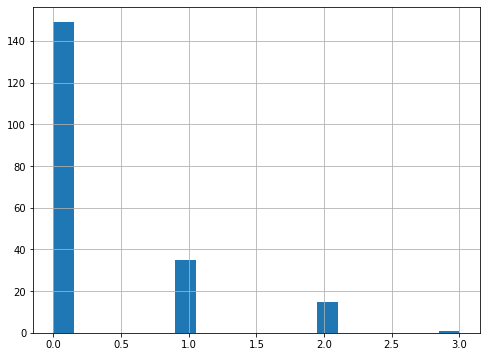

In [ ]:
# Quantidade de vezes de cada valor
print(df.pol_civis_mortos_serv.value_counts())

# Histograma de policiais civis mortos em serviço 
df['pol_civis_mortos_serv'].hist(bins=20, figsize=(8,6));

### Policiais militares mortos em serviço

Veremos agora a variável `pol_militares_mortos_serv`.

Adiante, vemos que 417 policiais militares foram mortos ao todo das 200 informações sobre a variável `pol_militares_mortos_serv` do nosso dataset, resultado que muito alto.

In [ ]:
# Quantidade de policiais militares mortos em serviço 
print('Quantidade de policiais civis mortos em serviço : ', df.pol_militares_mortos_serv.sum())

Quantidade de policiais civis mortos em serviço :  417.0


Como é possível ver abaixo, 33 vezes nenhum policial militar morreu, 58 vezes um policial militar morreu, 40 vezes dois policiais militares morreram e assim por diante.

1.0     58
2.0     40
0.0     33
3.0     33
4.0     20
5.0      6
7.0      6
6.0      3
10.0     1
Name: pol_militares_mortos_serv, dtype: int64


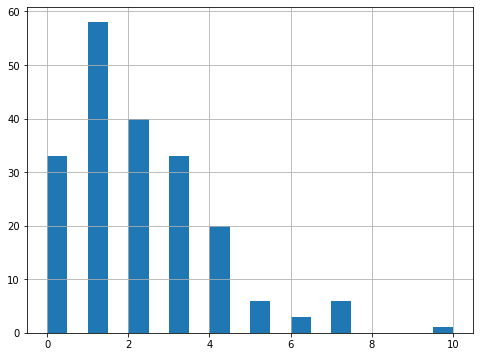

In [ ]:
# Quantidade de vezes de cada valor 
print(df.pol_militares_mortos_serv.value_counts())

# Histograma de policiais civis mortos em serviço 
df['pol_militares_mortos_serv'].hist(bins=20, figsize=(8,6));

###Total de mortes

Visto as estatísticas dos dados de mortes de policiais civis e militares, vou concatenar os dois atributos para uma melhor visualização das mortes totais de policiais.


In [ ]:
#Concatenar os atributos pol_civis_mortos_serv e pol_militares_mortos_serv
df_concat = pd.concat(objs=[df.pol_civis_mortos_serv, df.pol_militares_mortos_serv], axis=0)

In [ ]:
# Quantidade de policiais mortos em serviço 
print('Quantidade de policiais mortos em serviço : ', df_concat.sum())

Quantidade de policiais mortos em serviço :  485.0


Ao fim, vemos que ao todo dos nosso 200 dados que contem informações das nossa variáveis, um total de 485 policiais foram mortos distribuídos da seguinte forma:

0.0     182
1.0      93
2.0      55
3.0      34
4.0      20
5.0       6
7.0       6
6.0       3
10.0      1
dtype: int64


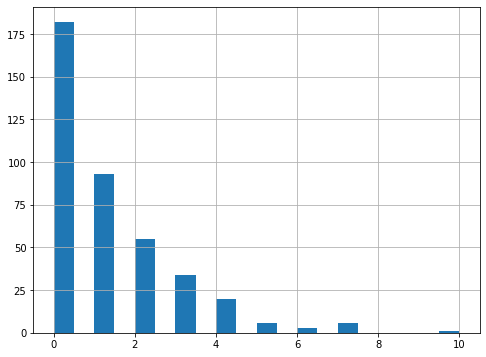

In [ ]:
# Quantidade de vezes de cada valor 
print(df_concat.value_counts())

# Histograma
df_concat.hist(bins=20, figsize=(8,6));

Acima, vemos como ficou a distribuição de todas as mortes dos policiais em serviço.

### Homicídio por intervenção policial 

Até agora, vimos as estatísticas dos policiais que morreram. 

Vamos agora ver brevemente os dados das pessoas que morreram devido a alguma intervenção policial.

In [ ]:
# Quantidade de pessoas mortas
print('Quantidade de policiais civis mortos em serviço : ', df.hom_por_interv_policial.sum())

Quantidade de policiais civis mortos em serviço :  18694.0


Assim, nos 260 dados disponíveis da variável ` hom_por_interv_policial`, temos que 18 694 pessoas que morreram em alguma intervenção policial. Número relativamente grande.

A seguir, vamos ver o histograma do nosso atributo.


75.0     8
38.0     7
102.0    6
74.0     6
37.0     5
        ..
84.0     1
123.0    1
157.0    1
155.0    1
72.0     1
Name: hom_por_interv_policial, Length: 114, dtype: int64


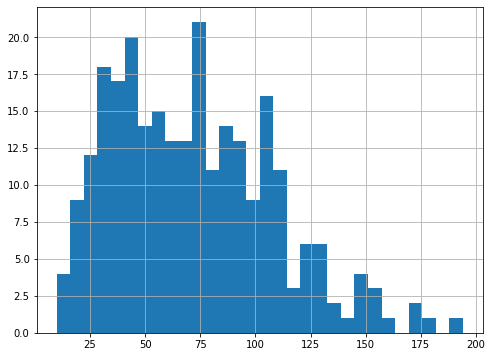

In [ ]:
# Quantidade de vezes de cada valor 
print(df.hom_por_interv_policial.value_counts().sort_values(ascending=False))

# Histograma
df.hom_por_interv_policial.hist(bins=30, figsize=(8,6));

Acima, vemos como as mortes estão distribuídas. Alguns fatos para se notar são que em 8 ocasiões ocorreram 75 mortes e 1 vez tiveram 157 mortes, o que é espantoso.

## Análise de Roubo a Caixa Eletrônico/Instituições Financeiras/Bancos

Outros tipos de crimes comuns são os roubos após saque em caixa eletrônico / instituições financeiras, de forma que pelo de vez em quando você ouve alguma notícia assim no telejornal. 

Dessa forma, é interessante analisar esses tipos de dados, pois insights tirados deles podem ser de grande importância para uma possível solução contra esse tipo de crime.

Além deles,  iremos verificar os dados de roubos a bancos.

Para isso, vamos analisar as variáveis `roubo_apos_saque`, `roubo_conducao_saque`, `roubo_cx_eletronico` e `roubo_banco `.

### Roubo após saque em instituição financeira

O primeiro atributo que vamos analisar é ` roubo_apos_saque`. Nele e nos outros citados vamos ver a sua quantidade total no dataset, além de fazer um histograma para uma melhor visualização dos dados.

In [ ]:
# Quantidade de Roubo após saque em instituição financeira
print('Quantidade de Roubo após saque em instituição financeira : ', df.roubo_apos_saque.sum())

Quantidade de Roubo após saque em instituição financeira :  29133.0


Pelo histograma abaixo é possível observar a variância dos dados, visto que temos em pouco mais de 16 meses do nosso dataset ocorreram mais de 150 roubos após saque, já em outros 4 meses ocorreram 50 roubos desse tipo e em outros 3 meses ocorreram mais de 250 roubos.

156.0    5
67.0     4
165.0    4
159.0    4
154.0    3
        ..
62.0     1
32.0     1
183.0    1
11.0     1
80.0     1
Name: roubo_apos_saque, Length: 122, dtype: int64


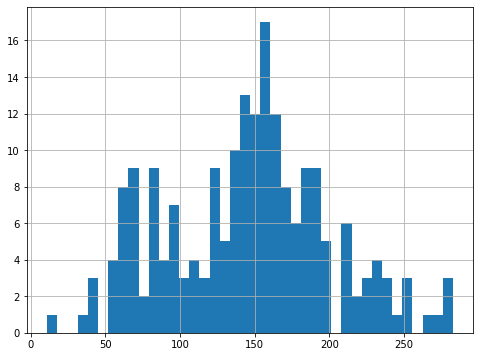

In [ ]:
# Quantidade de vezes de cada valor 
print(df.roubo_apos_saque.value_counts().sort_values(ascending=False))

# Histograma
df.roubo_apos_saque.hist(bins=40, figsize=(8,6));

Vamos então verificar os meses em que ocorreram mais roubos, com uma hipótese inicial de ser em dezembro visto que, por exemplo, é o mês que os trabalhadores recebem o décimo terceiro salário. 

Inicialmente, faremos uma cópia do nosso dataset, para que possamos fazer algumas alterações nele.

In [ ]:
# Copia do dataset
df_roubo = df.copy()

Em seguida, como queremos ver os maiores valores, vamos tirar todos os registros cujo número de roubos foi menor do que 272 e todos os dados faltantes.

In [ ]:
#Retirar os valores faltantes e tais que roubo_apos_saque<272
df_roubo.drop(df_roubo[df_roubo.roubo_apos_saque<272].index, axis=0, inplace=True)
df_roubo.dropna(subset=['roubo_apos_saque'], axis=0, inplace=True)

Vamos agora ver uma tabela só com os atributos importes para nossa análise.

In [ ]:
#Visualizacao dos dados importantes
df_roubo.iloc[:, [0,1,21]]

,vano,mes,roubo_apos_saque
148,2003,5,273.0
150,2003,7,278.0
155,2003,12,281.0
158,2004,3,283.0


Diante da tabela acima, vemos que o mais com o maior número de roubos com 283 casos foi em Março e, embora o segundo mês com maior quantidade de roubos tenha sido Dezembro com 281 casos, os meses que vem em sequência na lista são Julho e Maio.

Então apesar de termos dados interessantes, não conseguimos comprovar nossa hipótese de que os maiores números de roubos seriam em Dezembro.


### Roubo com condução da vítima para saque em instituição financeira

Agora vamos investigar os dados da variável ` roubo_conducao_saque`, procedendo da mesma forma que fizemos anteriormente com a variável passada.

In [ ]:
# Quantidade de Roubo com condução da vítima para saque em instituição financeira
print('Quantidade de Roubo com condução da vítima para saque em instituição financeira: ', df.roubo_conducao_saque.sum())

Quantidade de Roubo com condução da vítima para saque em instituição financeira:  2264.0


O nosso dataset possui então 2264 casos de roubos com condução da vítima para saque em instituição financeira, muito menos do que o número de roubos após saque em instituição financeira (29 133 casos).

Vamos agora ver o histograma da nossa variável.


8.0     18
6.0     17
11.0    15
9.0     13
5.0     12
14.0    12
4.0     12
10.0    12
12.0    10
18.0     9
Name: roubo_conducao_saque, dtype: int64


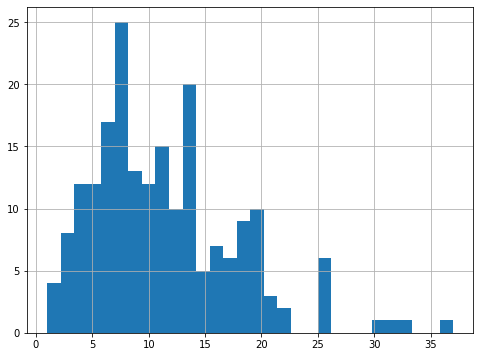

In [ ]:
# Quantidade de vezes de cada valor 
print(df.roubo_conducao_saque.value_counts().head(10))

# Histograma
df.roubo_conducao_saque.hist(bins=30, figsize=(8,6));

Pelo histograma acima, vemos que em aproximadamente 25 meses ocorreram entre 6-8 casos desse tipo de roubo. 

Além disso, percebemos que são poucos meses em que o número de casos aumenta drasticamente.  

### Roubo de caixa eletrônico

Vamos verificar agora a variável `roubo_cx_eletronico`.  

In [ ]:
# Quantidade de Roubos de caixa eletrônico
print('Quantidade de policiais civis mortos em serviço: ', df.roubo_cx_eletronico.sum())

Quantidade de policiais civis mortos em serviço:  710.0


Notamos então que são poucos roubos de caixa eletrônicos registrados (710 casos), em comparação com os tipos de roubos vistos anteriormente. 

Vamos agora ver o histograma da nossa variável.

3.0     34
2.0     32
1.0     31
4.0     26
5.0     19
0.0     17
6.0     14
7.0     12
8.0      5
11.0     4
9.0      2
12.0     2
10.0     2
Name: roubo_cx_eletronico, dtype: int64


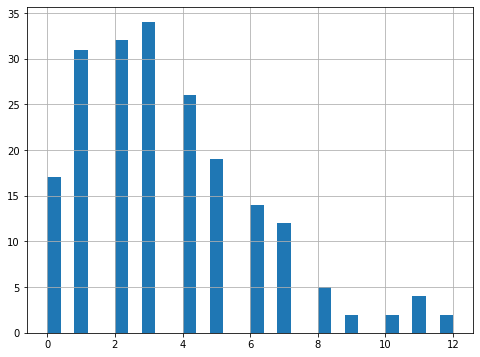

In [ ]:
# Quantidade de vezes de cada valor
print(df.roubo_cx_eletronico.value_counts().sort_values(ascending=False))

# Histograma
df.roubo_cx_eletronico.hist(bins=30, figsize=(8,6));

Pelo histograma acima vemos que, embora tenham tido 3-4 meses com 12 casos, os números de roubos a caixa eletrônico por mês são constantemente baixos tendo em média 0-4 casos.  

### Roubo a banco

Vamos verificar agora a variável `roubo_banco`.

In [ ]:
# Quantidade de Roubos a banco 
print('Quantidade de Roubos a banco: ', df.roubo_banco.sum())

Quantidade de Roubos a banco:  3225


1     52
2     48
3     40
5     21
0     16
4     16
17    11
13    11
10     9
14     9
Name: roubo_banco, dtype: int64


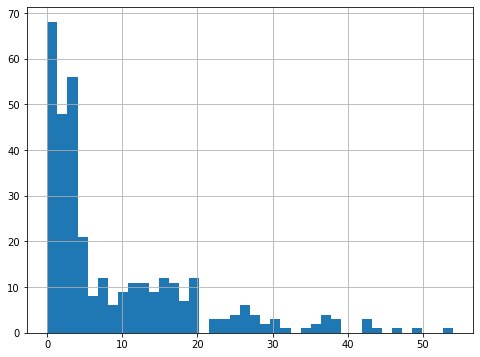

In [ ]:
# Quantidade de vezes de cada valor 
print(df.roubo_banco.value_counts().head(10))
# Histograma
df.roubo_banco.hist(bins=40, figsize=(8,6));

Assim como as duas últimas variáveis, não ocorrem muitos roubos de banco em um mesmo mês. Em média, ocorrem 0-3 roubos de banco por mês.  

## Conclusão

Ao final desse projeto vimos três analises. 

A de Veículos Roubados/Furtados, na qual verificamos que 43% dos carros são recuperados.

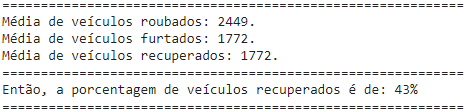


A de Mortes Policiais que constatamos que ao todo morreram 485 policias em serviço.
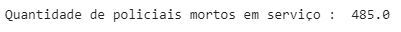 

E, por fim, a de roubos a bancos e caixas eletrônicos/instituições financeiras em que vimos a frequência desses tipos de roubos.

Em especial, vimos os meses do dataset que houveram mais roubos após saque em instituição financeira. No estudo, foi feita a hipótese de que esse tipo de roubo ocorreria mais no mês de dezembro, porém foi desmentida.

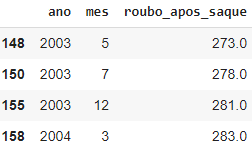

In [ ]:
# !pip install pandas_profiling==2.7.1 -q

In [ ]:
from pandas_profiling import ProfileReport

In [50]:
df_cpy = df[['vano', 'pol_civis_mortos_serv', 'pol_militares_mortos_serv', 'roubo_apos_saque',
             'roubo_conducao_saque', 'roubo_cx_eletronico', 'roubo_banco']].copy()

In [51]:
report = ProfileReport(df_cpy)
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]